In [1]:
#making the imports
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

print(tf.__version__)



1.13.1


In [2]:
#reading the train file
train = pd.read_csv('../input/fashion-mnist_train.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [4]:
#train shape
train.shape

(60000, 785)

In [5]:
#reading the test file
test = pd.read_csv('../input/fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [6]:
#shape of test data
test.shape

(10000, 785)

In [7]:
#defining the list for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
#splitting the data into X and y
train_images = train.iloc[:,1:785]
train_labels = train.iloc[:,0]

test_images = test.iloc[:,1:785]
test_labels = test.iloc[:,0]

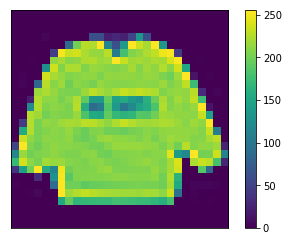

T-shirt/top


In [9]:
#plotting some fashion items from dataset. 
plt.figure()
plt.imshow(train_images.iloc[0].as_matrix().reshape(28,28))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

print(class_names[0])

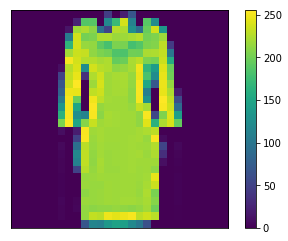

Dress


In [10]:
#plotting some fashion items from dataset. 
plt.figure()
plt.imshow(train_images.iloc[4].as_matrix().reshape(28,28))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

print(class_names[3])

In [11]:
#scaling the data so that the values are between 0 and 1

train_images = train_images / 255.0

test_images = test_images / 255.0

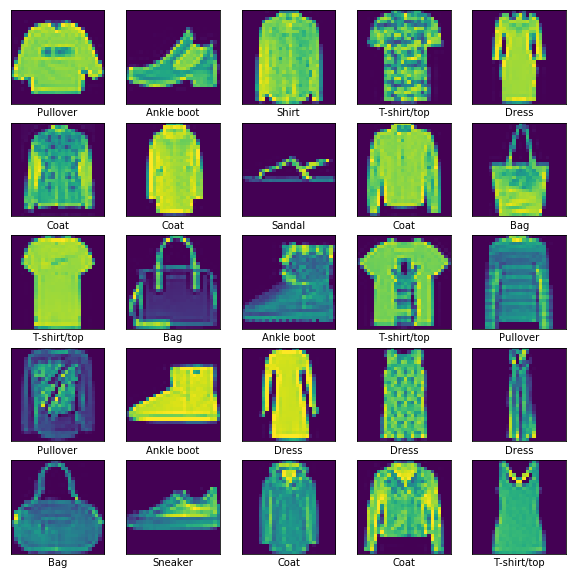

In [12]:
#displaying the first 25 images in training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images.iloc[i].as_matrix().reshape(28,28))
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#building the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

In [14]:
#compile the model

model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])


In [15]:
#converting to a np array
train_images = train_images.values
train_labels = train_labels.values

test_images = test_images.values
test_labels = test_labels.values



In [16]:
#train the model

model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.4998 - acc: 0.8189
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3710 - acc: 0.8639
Epoch 3/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3354 - acc: 0.8767
Epoch 4/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.3117 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2931 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2811 - acc: 0.8955
Epoch 7/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2680 - acc: 0.9002
Epoch 8/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2591 - acc: 0.9026
Epoch 9/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2471 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 8s 137us/samp

In [17]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('The test accuracy is: {} and test loss is: {}'.format(test_acc, test_loss))

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3019 - acc: 0.8906
The test accuracy is: 0.8906000256538391 and test loss is: 0.3019202382445335


In [18]:
#getting the predictions

predictions = model.predict(test_images)

In [19]:
#getting the prediction for first row in test set
np.argmax(predictions[0])

0

In [20]:
#comparing with actual label
print(test_labels[0])
print(class_names[0])

0
T-shirt/top


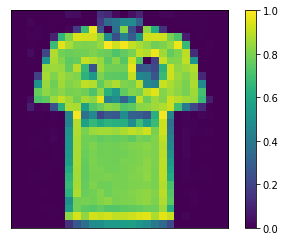

In [21]:
#plot the figure for first element in test set
plt.figure()
plt.imshow(test_images[0].reshape(28,28))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
#lets randomly do it for postion 99
x = np.argmax(predictions[999])
print(x)
print('\n')
print(test_labels[999])

5


5


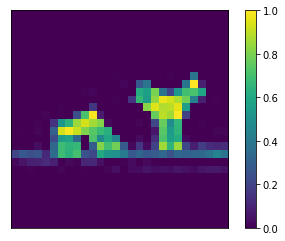

Sandal


In [23]:
#plot the figure for first element in test set
plt.figure()
plt.imshow(test_images[999].reshape(28,28))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

print(class_names[x])

**So Our model is quite accurate, as we have predicted some rendom values accurately. **